In [11]:
#linearregression is for linearly varying data, the DEPENDANT VARIABLE SHOULD BE CONTINUOUS(ie)numbers(no catogories and groups)

In [ ]:
# read the data and set the datetime as the index# read  
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime',parse_dates=True)

In [12]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
#to use matplotlib we must import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

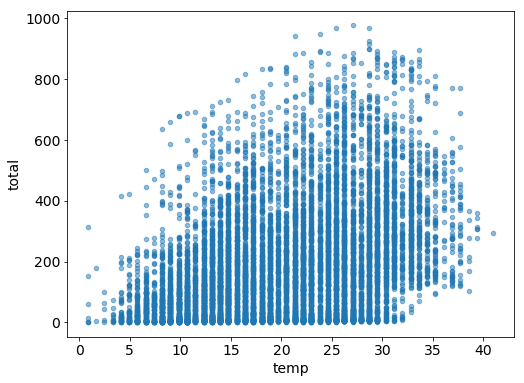

In [14]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.5)

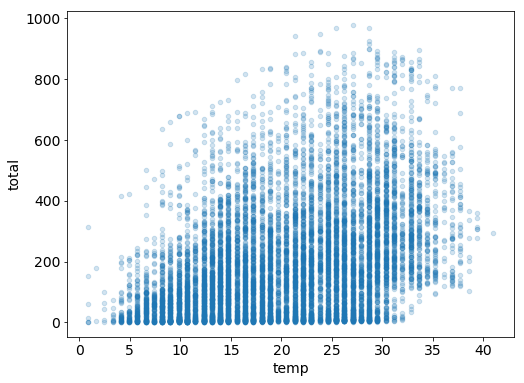

In [15]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

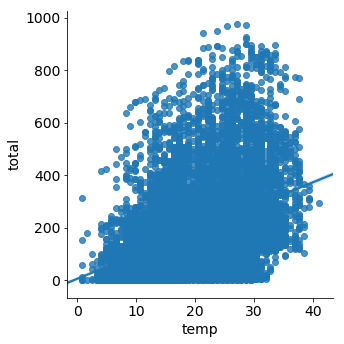

In [16]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes) #lm =line plot

In [105]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total



In [106]:
# import linear regression from scikit learn library, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()#invoke
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616639
[9.17054048]


In [108]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25 #with the formula y=mx+c

array([235.309725])

In [109]:
# use the predict method
linreg.predict(25)

array([235.309725])

In [110]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


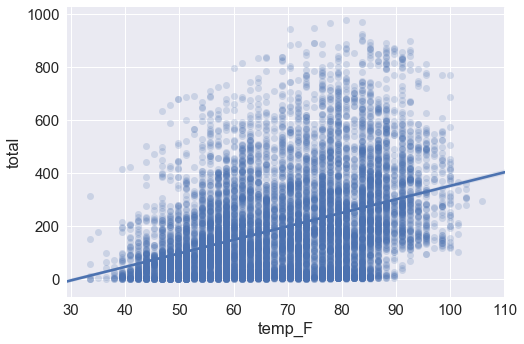

In [111]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [112]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129394
[5.09474471]


In [113]:
# convert 25 degrees Celsius to Fahrenheit
25 * 1.8 + 32

77.0

In [114]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25 #mistake since it has to be converted into fahrenheit

array([-29.61700002])

In [115]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*77

array([235.309725])

In [116]:
# predict rentals for 77 degrees Fahrenheit
linreg.predict(77)

array([235.309725])

In [117]:
#Conclusion: The scale of the features is irrelevant for linear regression models. 
     #When changing the scale, we simply change our interpretation of the coefficients.

In [118]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

In [119]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

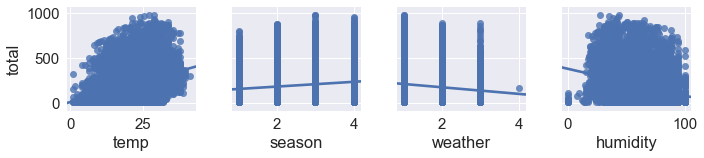

In [120]:
# multiple scatter plots in Seaborn HERE PAIRPLOT IS IMPORTANT
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

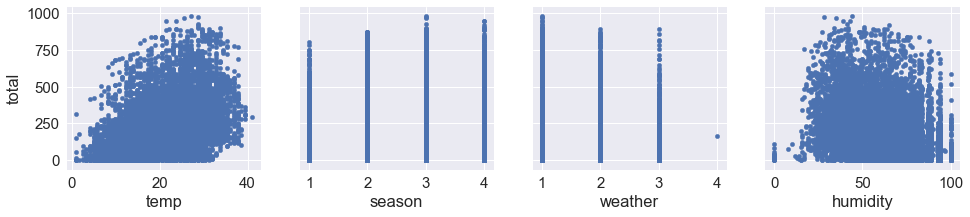

In [121]:
# multiple scatter plots in Pandas                                 #NOT SAID YET
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [122]:
# cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


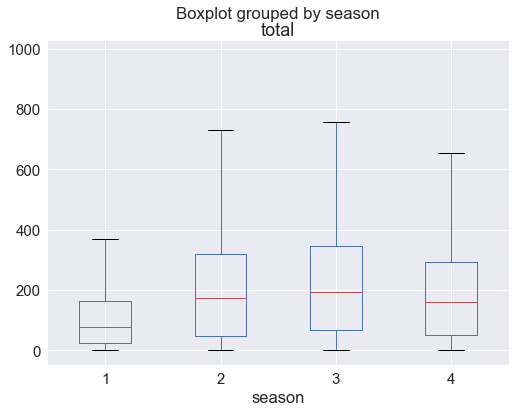

In [123]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

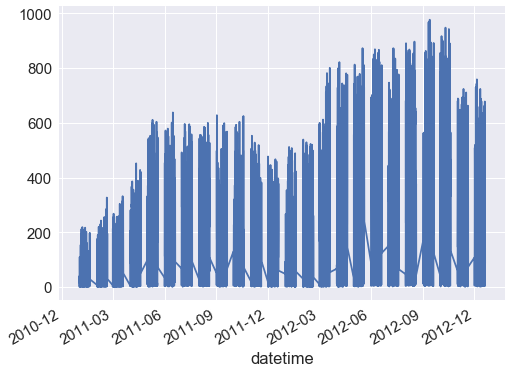

In [124]:
# line plot of rentals
bikes.total.plot()

In [125]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


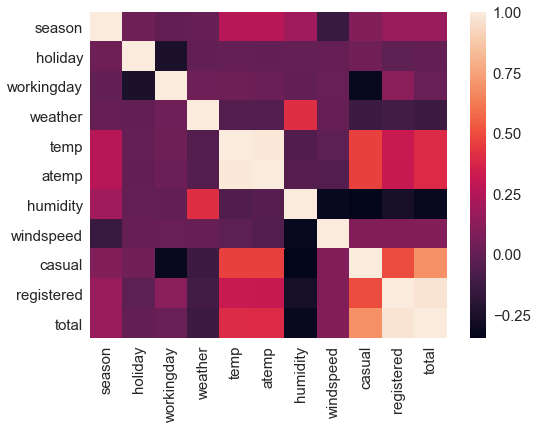

In [126]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr()) #white colour indicates more correlation

In [127]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [128]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129846
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [129]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477395),
 ('season', 22.538757532466796),
 ('weather', 6.670302035923786),
 ('humidity', -3.118873382396494)]

In [130]:
# example true and predicted response values# exampl 
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [131]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.7386127875258306


In [132]:
# same true values as above 
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


In [133]:
from sklearn.cross_validation import train_test_split #cross validation must be replaced by another name

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)#where randomstate is the seed ,it specifies 
    linreg = LinearRegression()                                                #WHICH DATAS ARE USED AS TRAINING DATA
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [135]:
# compare different sets of features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))

155.64945913079674
164.1653997629182
155.5981893669142


In [136]:
# using these as features is not allowed!
print (train_test_rmse(['casual', 'registered']))

2.1179319431210232e-13


In [137]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [138]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
#WE CAN DROP COLUMNS WHICH ARE SIMILAR TO OTHER COLUMNS FOR EXAMPLE FOR GENDER WE CAN EITHER HAVE MALE OR FEMALE COLUMN AND 
# print 5 random rows                                                 #IT CAN BE GIVEN IN THE SINGLE COLUMN AS ONE OR ZERO
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In [139]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [140]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575722),
 ('season_2', -3.3905430997184904),
 ('season_3', -41.73686071317088),
 ('season_4', 64.41596146824217),
 ('humidity', -2.819481636259651)]

In [141]:
# THE OUTPUT OF THE PREVIOUS MEANS:
#WHEN TEMPERATURE INCREASES THE NO OF BIKES RENTED WILL INCREASE
#IN SEASON 2 NO OF BIKES RENTED WILL DECREASE
#IN SEASON 3 NO OF BIKES RENTED WILL DECREASE
#IN SEASON 4 NO OF BIKES RENTED WILL INCREASE
#DURING HUMIDITY  NO OF BIKES RENTED WILL INCREASE

In [142]:
# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.59818936691417
154.33394593635998


In [17]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

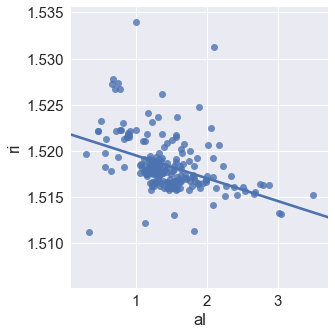

In [33]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

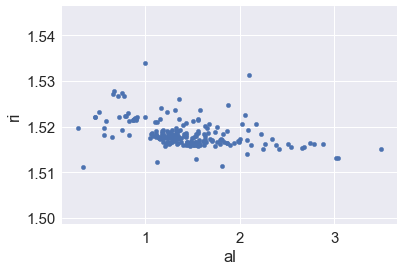

In [34]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0,0.5,'ri')

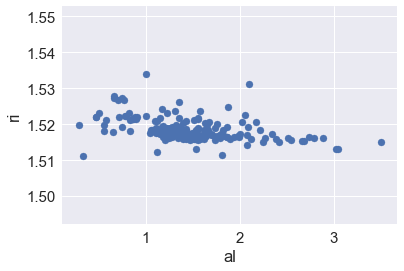

In [35]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [36]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# make predictions for all values of X=glass[feature_cols]=["al"]
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0,0.5,'Predicted ri')

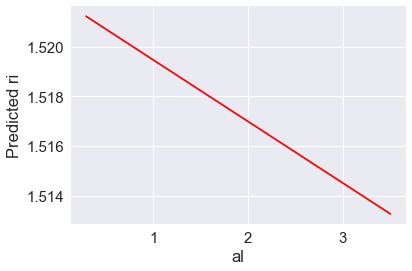

In [38]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0,0.5,'predicted ri')

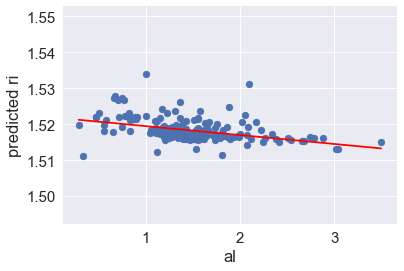

In [39]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('predicted ri')

In [41]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [42]:
print(linreg.intercept_)
print(linreg.coef_) #done on my own

1.5219453302386425
[-0.00247761]


In [43]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [44]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))

[('al', -0.0024776063874696235)]

In [45]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243 #that is when al is 3 the predicted coefficients will decrease by 0.0025

1.5145125136125304

In [46]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([1.51451251])

In [47]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [ ]:
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

Text(0,0.5,'household')

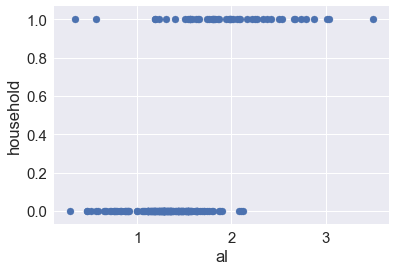

In [61]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

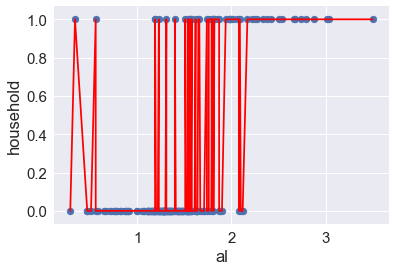

In [60]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')
plt.plot(glass.al, glass.household, color='red')

In [52]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0,0.5,'household_pred')

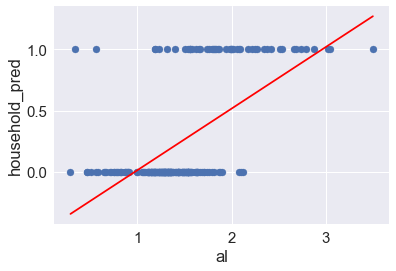

In [55]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.lmzplot(glass.al, glass.household_pred, color='red')#GRAPH BETWEEN "al" AND "household_pred"
plt.xlabel('al')
plt.ylabel('household_pred')

In [56]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [57]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head() #it will assign 1 if the values in glass.household_pred value is greater than 0.5

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


In [58]:
print(glass)

          ri     na    mg    al     si     k     ca    ba    fe  glass_type  \
id                                                                            
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.00  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16           1   
184  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00  0.00           6   
110  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00           2   
158  1.52121  14.03  3.76  0.58  71.79  0.11   9.65  0.00  0.00           3   
153  1.51779  13.64  3.65  0.65  73.00  0.06   8.93  0.00  0.00           3   
104  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00           2   
113  1.52777  12.64  0.00  0.67  72.02  0.06  14.40 

Text(0,0.5,'household_pred-class')

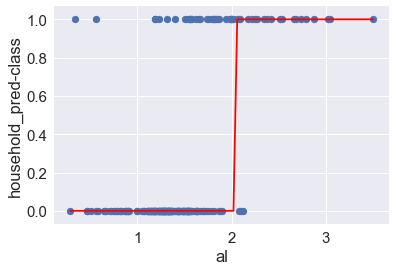

In [190]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household_pred-class')

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
#it is for CATOGORICAL VALUES and with two catories for binomial and multi catogories for multinomial logistic regression

In [62]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']            #for glasses both linear and logistic regression was done for the purpose of
X = glass[feature_cols]          # understanding the need for logistic regression  
y = glass.household
logreg.fit(X, y)                         
glass['household_pred_class'] = logreg.predict(X)

In [63]:
print(logreg.intercept_)
print(logreg.coef_)

[-4.12790736]
[[2.01099096]]


Text(0,0.5,'household')

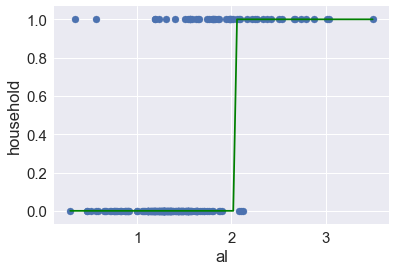

In [67]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='green')#GRAPH BETWEEN "al" AND "household_pred_class"
plt.xlabel('al')
plt.ylabel('household')

In [66]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]#it predicts the value probably so use keyword proba
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.028066
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.030943
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.043012


Text(0,0.5,'household_pred_prob')

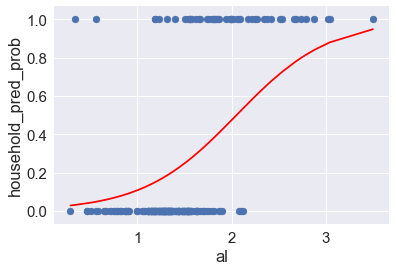

In [197]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household_pred_prob')

In [198]:
# examine some example predictions
print (logreg.predict_proba(1))
print (logreg.predict_proba(2))
print (logreg.predict_proba(3))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


In [201]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table
                       #where formula for odds is (p)/(1-p)

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [202]:
# exponential function: e^1
np.exp(1) #it is just an exponential function in calcultor

2.718281828459045

In [203]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)#it is nothing but taking natural log(ln)  for the exponential value found using the calculator

0.999896315728952

In [204]:
np.log(np.exp(5))

5.0

In [205]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


Text(0,0.5,'household')

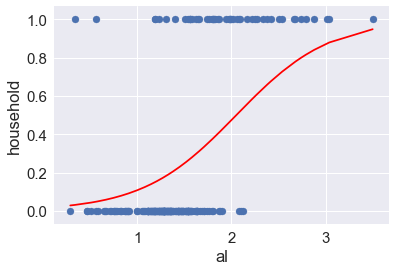

In [206]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [215]:
print(logreg.intercept_)
print(logreg.coef_)

[-4.12790736]
[[2.01099096]]


In [241]:
print(logreg.intercept_)
print(logreg.coef_[0])

[-4.12790736]
[2.01099096]


In [242]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [248]:
# convert log-odds to odds# conver 
odds = np.exp(logodds)
odds

array([0.89949172])

In [244]:
# convert odds to probability
prob = odds/(1 + odds)
prob #manualy calculating the probability

array([0.47354338])

In [255]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1] #computing by means of predict_proba

array([0.47354338])

In [256]:
# examine the coefficient for al
list(zip(feature_cols, logreg.coef_[0]))

[('al', 2.0109909641729433)]

In [253]:
print(logreg.intercept_)
print(logreg.coef_)


[-4.12790736]
[[2.01099096]]


In [68]:
# increasing al by 1 (so that al=3) increases the log-odds(for 2) by 2.01
logodds = -0.10592543+2.0109909641729433
odds = np.exp(logodds)
odds

6.719847992885822

In [265]:
prob = odds/(1 + odds)
prob

0.8704637706698961

In [252]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([0.87046377])

In [ ]:
#FOR REFERENCE FROM FRONT

In [266]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [235]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [236]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))


[('al', -0.0024776063874696235)]

In [237]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [238]:
# compute prediction for al=3 using the predict method
linreg.predict(3)


array([1.51451251])

In [239]:
#UPTO THIS REFERENCE

In [267]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

In [268]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.01586095])

In [270]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)
glass["high_ba"].head()

id
22     0
185    0
40     0
39     0
51     0
Name: high_ba, dtype: int32

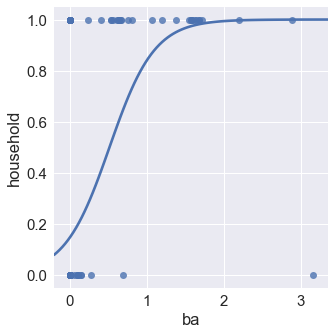

In [271]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

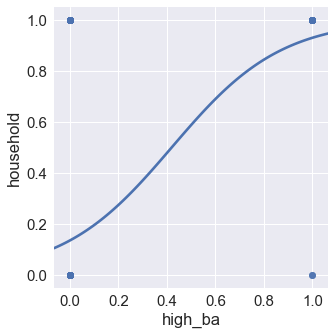

In [272]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

In [ ]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

In [273]:
# examine the coefficient for high_ba
list(zip(feature_cols, logreg.coef_[0]))

[('al', 2.0109909641729433)]

In [276]:
#ANOTHER EXAMPLE

In [277]:
#import libraries and files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing

In [279]:
# load tic-tac-toe data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", sep=",")
data.rename(columns={'x': 'top left', 'x.1': 'top middle', 'x.2': 'top right','x.3': 'middle left', 'o': 'middle middle', 
                     'o.1' : 'middle right', 'x.4' : 'bottom left', 'o.2' : 'bottom middle', 'o.3':'bottom right',
                     'positive' : 'outcome'},inplace=True)

In [286]:
data.head(3)

,top left,top middle,top right,middle left,middle middle,middle right,bottom left,bottom middle,bottom right,outcome
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive


In [285]:
data.shape

(957, 10)

In [281]:
#data preprocessing
data_new = pd.get_dummies(data.iloc[:,0:9])

In [288]:
data_new.head()

,top left_b,top left_o,top left_x,top middle_b,top middle_o,top middle_x,top right_b,top right_o,top right_x,middle left_b,...,middle right_x,bottom left_b,bottom left_o,bottom left_x,bottom middle_b,bottom middle_o,bottom middle_x,bottom right_b,bottom right_o,bottom right_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [290]:
data_final = pd.concat([data_new, data.iloc[:,9]],axis=1)
data_final.head()

,top left_b,top left_o,top left_x,top middle_b,top middle_o,top middle_x,top right_b,top right_o,top right_x,middle left_b,...,bottom left_b,bottom left_o,bottom left_x,bottom middle_b,bottom middle_o,bottom middle_x,bottom right_b,bottom right_o,bottom right_x,outcome
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,positive
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,positive
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,positive
3,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,positive
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,positive


In [292]:
# Split data into training and test sets
train, test = train_test_split(data_final, test_size=0.3)

In [293]:
#Applying logistic Regression model#Applyin 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [294]:
x_train = train.iloc[:, :-1]
y_train= train.iloc[:, -1]
x_test = test.iloc[:, :-1]
y_test= test.iloc[:, -1]
LR = LR.fit(x_train, y_train)

In [295]:
LR.score(x_train, y_train)

0.9805680119581465

In [1]:
#Evaluate model on test data
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
prob = LR.predict_proba(x_test)
predicted= LR.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'LR' is not defined

In [297]:
#Finding the accuracy using cross validation method
scores = cross_val_score(LogisticRegression(), data_final.iloc[:, 0:27], data_final.iloc[:, 27], scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.97938144 1.         0.98958333 1.         1.         0.96842105
 0.98947368 1.         1.         0.83157895]
0.9758438460842829
